# Import All Packages:

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm 

In [2]:
data=pd.read_csv('../input/nifty50-stock-market-data/TATASTEEL.csv')

In [3]:
data.shape

(5141, 15)

In [4]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


# Time Series Data Analysis:

In [5]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5.141000e+03,5.141000e+03,2291.000000,4.627000e+03,4627.000000
mean,396.910971,397.732494,404.508432,390.094184,396.878389,396.963616,397.492286,5.712353e+06,2.337995e+14,85658.531646,1.486743e+06,0.264356
std,184.068100,184.436294,187.473620,180.748337,183.983050,184.033980,184.200879,4.468171e+06,1.967048e+14,43482.517505,1.098645e+06,0.107644
min,67.250000,66.000000,69.700000,66.000000,67.300000,67.250000,67.970000,2.329100e+04,2.159165e+11,2796.000000,2.415800e+04,0.045100
25%,269.100000,269.700000,276.200000,264.200000,269.000000,269.550000,270.130000,2.747302e+06,1.090847e+14,56384.500000,7.553040e+05,0.185000
50%,399.400000,400.000000,406.350000,393.500000,399.150000,399.500000,400.110000,4.656970e+06,1.894465e+14,76396.000000,1.216569e+06,0.256200
75%,517.450000,518.000000,525.000000,510.000000,517.150000,517.450000,517.560000,7.460379e+06,3.194137e+14,103045.000000,1.945290e+06,0.330100
max,988.900000,997.300000,1048.000000,966.250000,993.000000,988.900000,1006.010000,4.940735e+07,2.402878e+15,428867.000000,1.647099e+07,0.970100


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5141 non-null   object 
 1   Symbol              5141 non-null   object 
 2   Series              5141 non-null   object 
 3   Prev Close          5141 non-null   float64
 4   Open                5141 non-null   float64
 5   High                5141 non-null   float64
 6   Low                 5141 non-null   float64
 7   Last                5141 non-null   float64
 8   Close               5141 non-null   float64
 9   VWAP                5141 non-null   float64
 10  Volume              5141 non-null   int64  
 11  Turnover            5141 non-null   float64
 12  Trades              2291 non-null   float64
 13  Deliverable Volume  4627 non-null   float64
 14  %Deliverble         4627 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 602.6

In [7]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [8]:
data=data[['Open', 'High', 'Low', 'Last', 'VWAP', 'Volume','Close']]

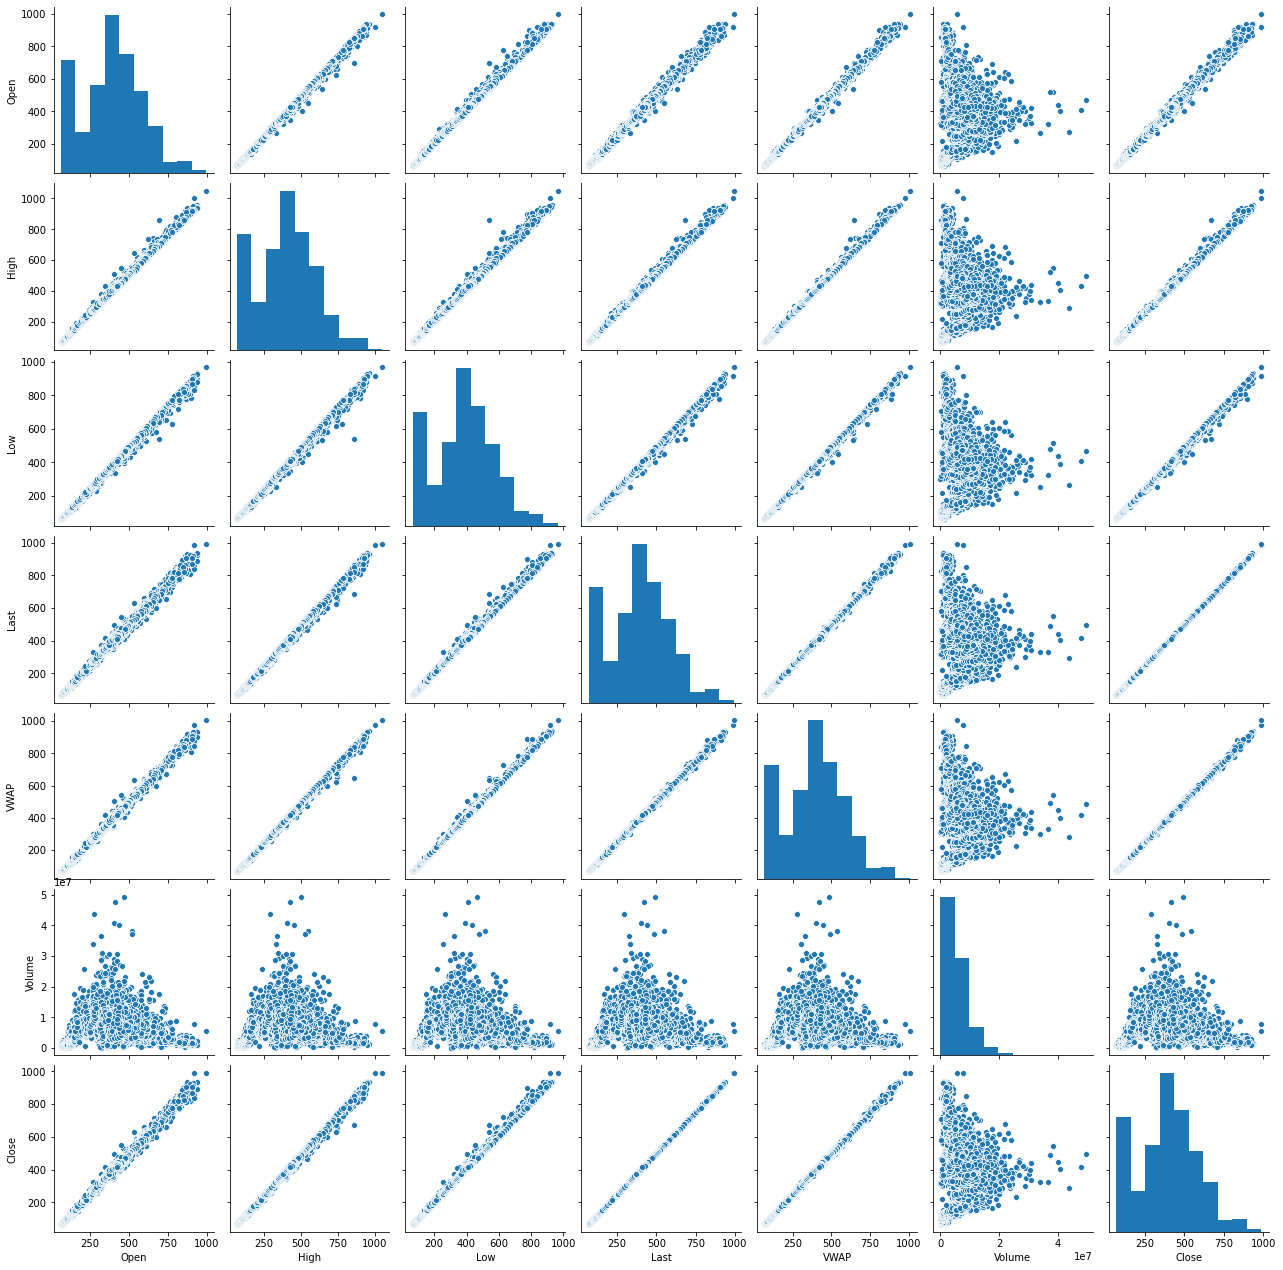

In [9]:
sns.pairplot(data)

In [10]:
data.head()

,Open,High,Low,Last,VWAP,Volume,Close
0,148.00,153.2,146.10,152.50,150.92,2003185,152.45
1,150.10,153.0,143.05,151.95,151.03,1555136,150.80
2,144.60,162.9,144.60,158.00,156.85,3840284,156.55
3,158.95,169.1,158.95,169.00,167.61,2560449,168.25
4,173.40,179.0,166.30,170.55,173.89,3641691,171.95


In [11]:
uni_data=data['Close'].values

In [12]:
len(uni_data)

5141

In [15]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f640ad1f2d0>,
      dtype=object)

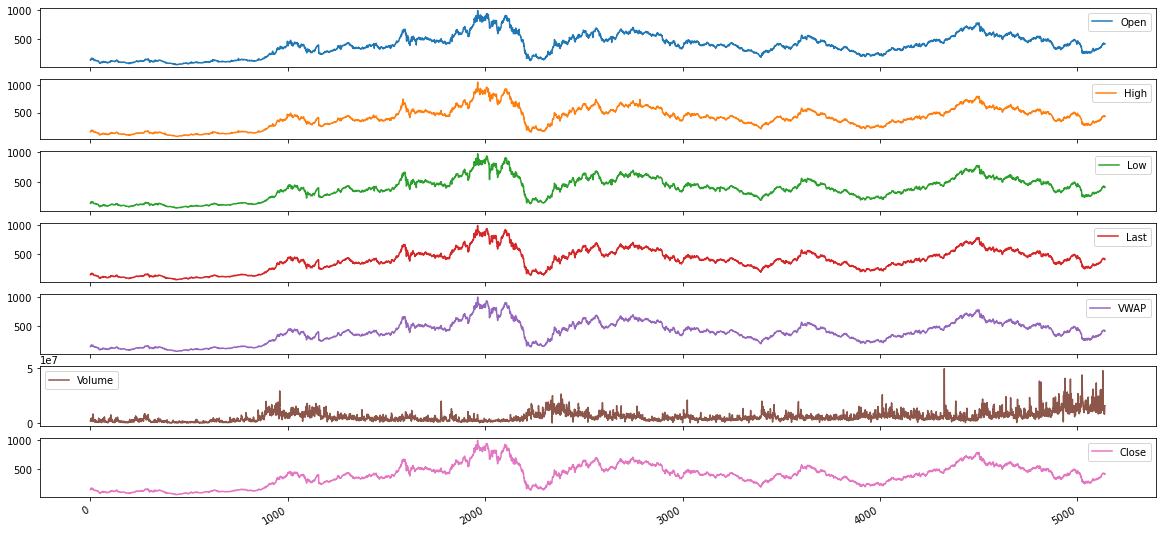

In [16]:
import matplotlib.pyplot as plt

data.plot(subplots=True)


# Simple Moving Averages:

In [17]:
def prepare_data(dataset,start_index,end_index,window_size):
    labels=[]
    features=[]
    for i in range(start_index,end_index-window_size):
        l=range(i,i+window_size)
        features.append(dataset[l])
        labels.append(dataset[l[-1]+1])
        
    return np.array(features),np.array(labels)  

In [18]:
x_train,y_train=prepare_data(uni_data,0,4000,5)
x_test,y_test=prepare_data(uni_data,4000,5141,5)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3995, 5)
(3995,)
(1136, 5)
(1136,)


Text(0, 0.5, 'closing price values')

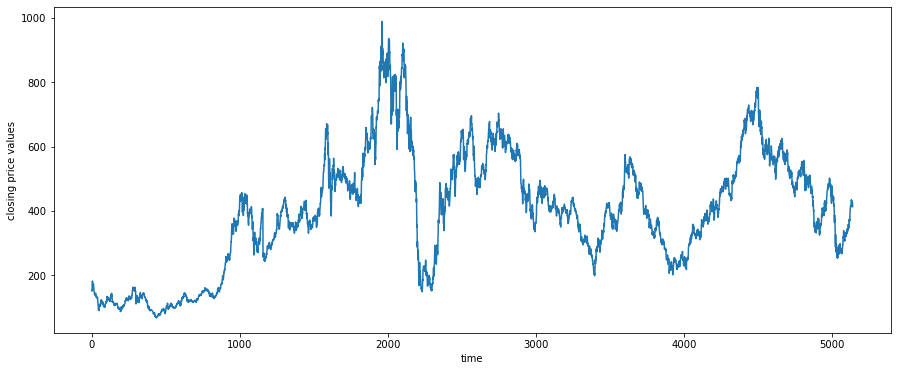

In [20]:
import matplotlib.pyplot as plt 

fig,ax=plt.subplots(figsize=(15,6))
ax.plot(uni_data)
plt.xlabel('time')
plt.ylabel('closing price values')

In [21]:
def moving_averages_model(input_data):
    return np.mean(input_data)

In [22]:
y_pred=[]

for i in range(len(x_train)):
    y_pred.append(moving_averages_model(x_train[i]))

In [23]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(y_train,np.array(y_pred))

In [24]:
window=[3,4,5,6,7,8,9,10]
train_loss=[]
test_loss=[]
for i in window:
    x_train,y_train=prepare_data(uni_data,0,4000,i)
    x_test,y_test=prepare_data(uni_data,4000,5141,i)
    y_train_pred=[]
    y_test_pred=[]
    for j in range(len(x_train)):
        y_train_pred.append(moving_averages_model(x_train[j]))
    for j in range(len(x_test)):
        y_test_pred.append(moving_averages_model(x_test[j]))
    train_loss.append(mean_squared_error(y_train,np.array(y_train_pred)))
    test_loss.append(mean_squared_error(y_test,np.array(y_test_pred)))
    
    

In [25]:
plt.rcParams["figure.figsize"] = [10, 6]

Text(0, 0.5, 'losses')

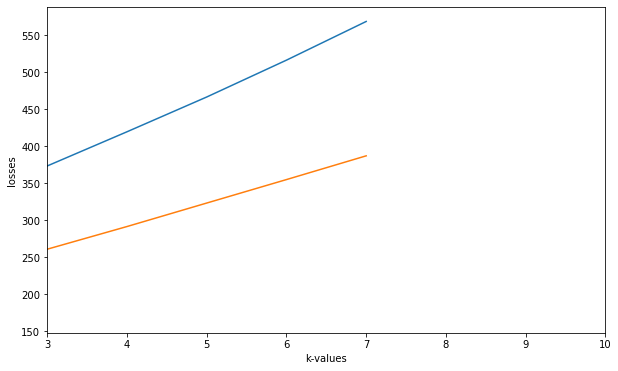

In [26]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlim(3,10)
plt.xlabel('k-values')
plt.ylabel('losses')

In [27]:
x_train,y_train=prepare_data(uni_data,0,4000,3)
x_test,y_test=prepare_data(uni_data,4000,5141,3)

y_test_pred=[]

for i in range(len(x_test)):
    y_test_pred.append(moving_averages_model(x_test[i]))

Text(0.5, 1.0, 'predictions')

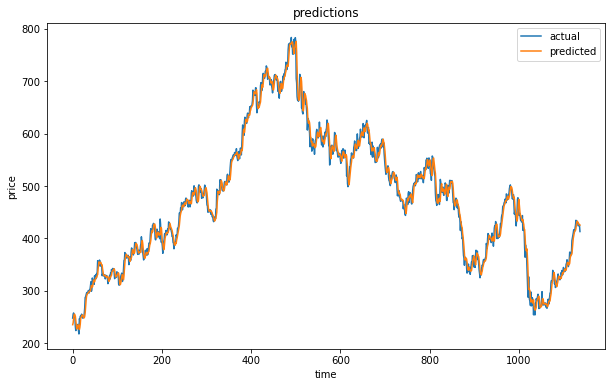

In [28]:
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

#   Weighted Moving Averages Model:

In [29]:
def weighted_ma_model(x,n):
    w=np.array(range(1,n+1))
    y_pred=np.dot(w,x)/np.sum(w)
    return y_pred

In [30]:
x_train,y_train=prepare_data(uni_data,0,4000,5)
x_test,y_test=prepare_data(uni_data,4000,5141,5)

In [31]:
window=[3,4,5,6,7,8,9,10]
train_loss=[]
test_loss=[]
for i in window:
    x_train,y_train=prepare_data(uni_data,0,4000,i)
    x_test,y_test=prepare_data(uni_data,4000,5141,i)
    y_train_pred=[]
    y_test_pred=[]
    for j in range(len(x_train)):
        y_train_pred.append(weighted_ma_model(x_train[j],i))
    for j in range(len(x_test)):
        y_test_pred.append(weighted_ma_model(x_test[j],i))
    train_loss.append(mean_squared_error(y_train,np.array(y_train_pred)))
    test_loss.append(mean_squared_error(y_test,np.array(y_test_pred)))
    

Text(0, 0.5, 'losses')

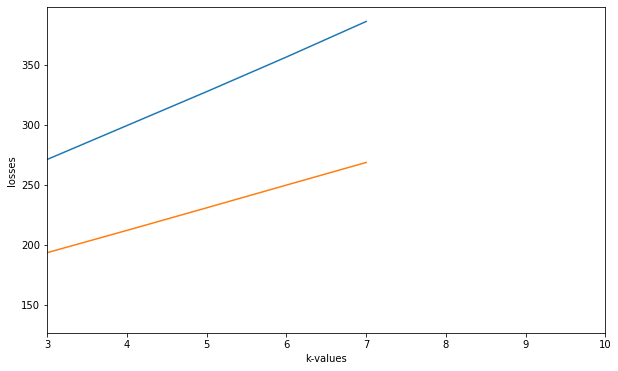

In [32]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlim(3,10)
plt.xlabel('k-values')
plt.ylabel('losses')

In [33]:
x_train,y_train=prepare_data(uni_data,0,4000,3)
x_test,y_test=prepare_data(uni_data,4000,5141,3)

y_test_pred=[]

for i in range(len(x_test)):
    y_test_pred.append(weighted_ma_model(x_test[i],3))

Text(0.5, 1.0, 'predictions')

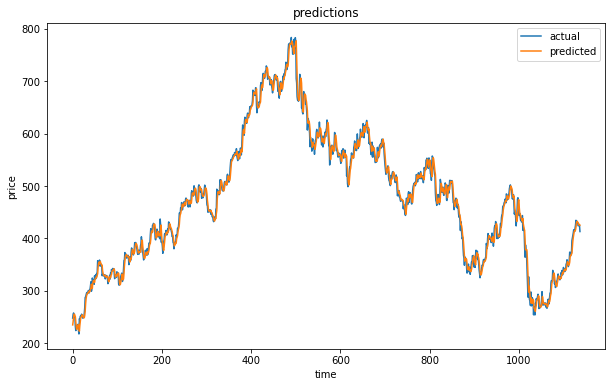

In [34]:
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

# ARIMA Model for Time Series Forecasting:

In [35]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(uni_data[:4000], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3999
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -15534.247
Method:                       css-mle   S.D. of innovations             11.770
Date:                Sun, 13 Sep 2020   AIC                          31082.495
Time:                        18:08:48   BIC                          31126.551
Sample:                             1   HQIC                         31098.112
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.185      0.112      0.911      -0.342       0.383
ar.L1.D.y      0.0365      0.016      2.309      0.021       0.006       0.067
ar.L2.D.y      0.0215      0.016      1.362      0.1

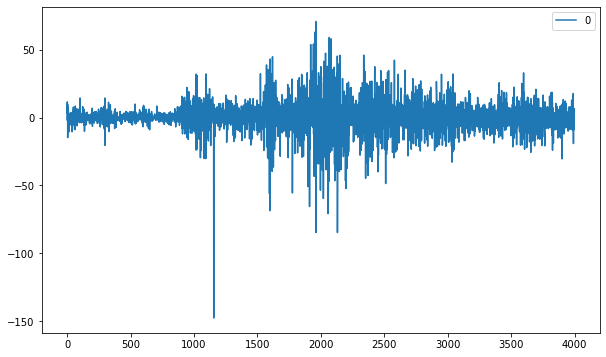

In [36]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

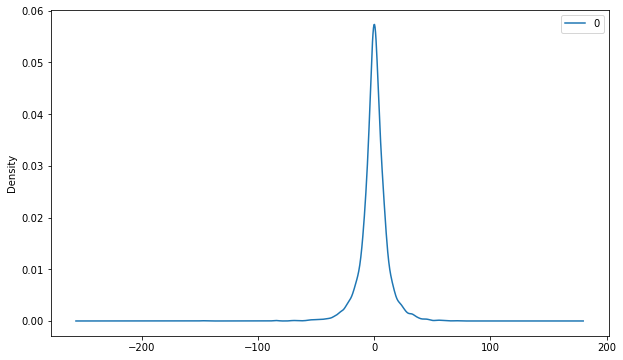

In [37]:

residuals.plot(kind='kde')

In [117]:
from tqdm import tqdm

history = list(uni_data[:4000])
y_test_pred = list()
for t in tqdm(range(4000,len(uni_data))):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    y_test_pred.append(yhat)
    obs = uni_data[t]
    history.append(obs)

 54%|█████▍    | 617/1141 [02:46<02:18,  3.78it/s]/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 73%|███████▎  | 835/1141 [03:48<01:25,  3.57it/s]/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100%|██████████| 1141/1141 [05:15<00:00,  3.62it/s]


Text(0.5, 1.0, 'predictions')

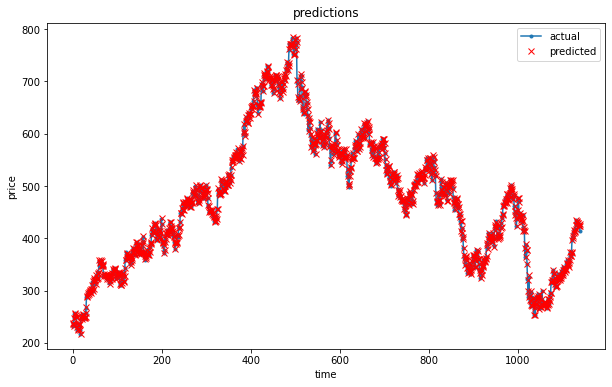

In [124]:
plt.plot(uni_data[4000:],'.-',label='actual')
plt.plot(y_test_pred,'rx',label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

# Univariate time-series forecasting:LSTM'S

In [38]:
x_train,y_train=prepare_data(uni_data,0,4000,10)
x_test,y_test=prepare_data(uni_data,4000,5141,10)

In [39]:
x_train_mean=np.mean(x_train,axis=0)
x_train_std=np.std(x_train,axis=0)
x_train = (x_train-x_train_mean)/x_train_std
x_test = (x_test-x_train_mean)/x_train_std

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3990, 10)
(3990,)
(1131, 10)
(1131,)


## Model Architecture:

In [41]:
from tensorflow.keras.layers import Dense,LSTM,Input

from tensorflow.keras.models import Model

input1=Input(shape=(10,1))

x=LSTM(8,activation='relu')(input1) 


x=Dense(16,activation='relu')(x)
x=Dense(1)(x)

model=Model(inputs=input1,outputs=x)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop', loss='mae')

## Model Training:

In [43]:
model.fit(x_train,y_train,batch_size=8, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
499/499 [==============================] - 10s 20ms/step - loss: 142.3703 - val_loss: 25.2064
Epoch 2/10
499/499 [==============================] - 9s 19ms/step - loss: 27.6213 - val_loss: 28.5353
Epoch 3/10
499/499 [==============================] - 9s 19ms/step - loss: 26.3812 - val_loss: 24.3489
Epoch 4/10
499/499 [==============================] - 11s 22ms/step - loss: 26.0570 - val_loss: 28.4462
Epoch 5/10
499/499 [==============================] - 9s 19ms/step - loss: 25.6122 - val_loss: 33.7929
Epoch 6/10
499/499 [==============================] - 9s 19ms/step - loss: 25.1718 - val_loss: 35.1273
Epoch 7/10
499/499 [==============================] - 9s 18ms/step - loss: 25.2058 - val_loss: 21.1397
Epoch 8/10
499/499 [==============================] - 9s 19ms/step - loss: 24.5801 - val_loss: 20.8746
Epoch 9/10
499/499 [==============================] - 9s 19ms/step - loss: 24.6199 - val_loss: 25.6581
Epoch 10/10
499/499 [==============================] - 11s 22ms/step -

# Predictions And Plot Results:

Text(0.5, 1.0, 'predictions')

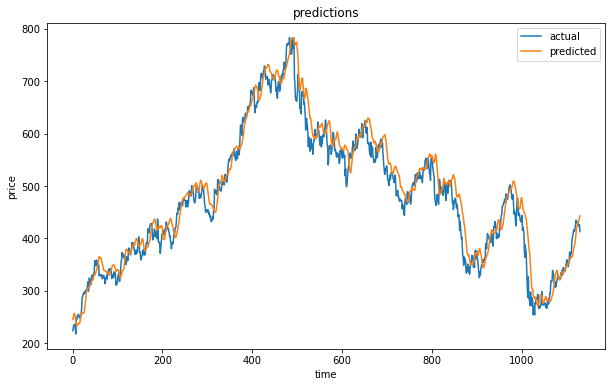

In [44]:
y_test_pred=model.predict(x_test)
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

# Multi-variate & single-step forecasting:LSTM'S

In [45]:
def prepare_data_mul(dataset,start_index,end_index,window_size):
    labels=[]
    features=[]
    for i in range(start_index,end_index-window_size):
        l=range(i,i+window_size)
        features.append(dataset[l])
        labels.append(dataset[l[-1]+1][-1])
        
    return np.array(features),np.array(labels)  

data1=data.values
x_train,y_train=prepare_data_mul(data1,0,4000,10)
x_test,y_test=prepare_data_mul(data1,4000,5141,10)

In [46]:
x_train_mean=np.mean(x_train,axis=0)
x_train_std=np.std(x_train,axis=0)
x_train = (x_train-x_train_mean)/x_train_std
x_test = (x_test-x_train_mean)/x_train_std

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3990, 10, 7)
(3990,)
(1131, 10, 7)
(1131,)


## Model Architecture:

In [49]:
from tensorflow.keras.layers import Dense,LSTM,Input

from tensorflow.keras.models import Model

input1=Input(shape=(10,7))

x=LSTM(32,activation='relu',return_sequences=True)(input1) 


x=LSTM(16,activation='relu')(x)


x=Dense(16,activation='relu')(x)
x=Dense(1)(x)

model=Model(inputs=input1,outputs=x)

model.compile(optimizer='rmsprop', loss='mae')

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 7)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            5120      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 8,545
Trainable params: 8,545
Non-trainable params: 0
_________________________________________________________________


## Model Training:

In [50]:
model.fit(x_train,y_train,batch_size=8, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
499/499 [==============================] - 18s 36ms/step - loss: 89.4239 - val_loss: 32.8116
Epoch 2/10
499/499 [==============================] - 18s 36ms/step - loss: 32.7107 - val_loss: 48.6068
Epoch 3/10
499/499 [==============================] - 18s 35ms/step - loss: 30.8685 - val_loss: 75.4534
Epoch 4/10
499/499 [==============================] - 18s 36ms/step - loss: 28.5919 - val_loss: 39.8934
Epoch 5/10
499/499 [==============================] - 18s 35ms/step - loss: 26.9762 - val_loss: 28.9302
Epoch 6/10
499/499 [==============================] - 18s 37ms/step - loss: 25.6133 - val_loss: 20.6709
Epoch 7/10
499/499 [==============================] - 17s 35ms/step - loss: 23.6472 - val_loss: 16.6011
Epoch 8/10
499/499 [==============================] - 18s 36ms/step - loss: 21.9237 - val_loss: 45.3708
Epoch 9/10
499/499 [==============================] - 19s 38ms/step - loss: 21.1923 - val_loss: 29.7633
Epoch 10/10
499/499 [==============================] - 18s 35ms/

# Predictions And Plot Results:

Text(0.5, 1.0, 'predictions')

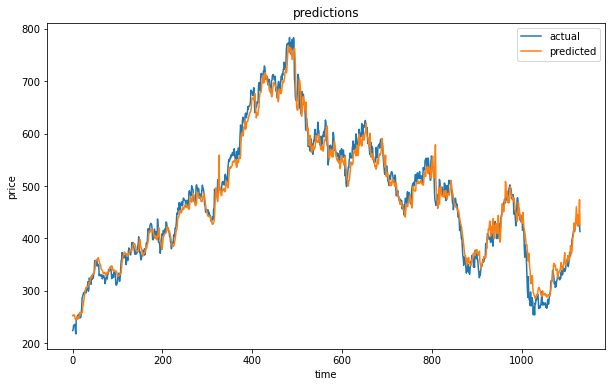

In [51]:
y_test_pred=model.predict(x_test)
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')